In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import plot_roc_curve, confusion_matrix, mean_squared_error

The data set contains nine cellular indicators of breast cancer for 683 patients.


1. Patient id number
2. Clump Thickness (1-10)
3. Uniformity of Cell Size (1-10)
4. Uniformity of Cell Shape (1-10)
5. Marginal Adhesion (1-10)
6. Single Epithelial Cell Size (1-10)
7. Bare Nuclei (1-10)
8. Bland Chromatin (1-10)
9. Normal Nucleoli (1-10)
10. Mitoses (1-10)
11. Class: (2 for benign, 4 for malignant)

In [15]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                  header=None,
                  na_values="?")
data.columns = ['patient_id','thickness','size_uniformity','shape_uniformity','adhesion','cell_size','bare_nuclei',
               'chromatin','nucleoli','mitosis','cancer']
data = data.dropna().astype(int)
data

,patient_id,thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,chromatin,nucleoli,mitosis,cancer
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Scatter Plots
Let's see if we can see any obvious correlations between the features.

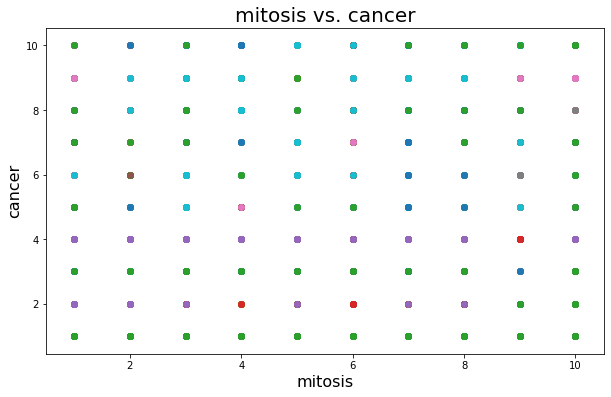

In [7]:
scattered = []
for column in data.columns:
    for other_column in data.columns:
        if column == other_column or column=='cancer':
            pass
        elif column == 'patient_id' or other_column =='patient_id':
            pass
        elif (column, other_column) in scattered or (other_column, column) in scattered:
            pass
        else:
            scattered.append((column, other_column))
            scattered.append((other_column, column))
            plt.title(f"{column} vs. {other_column}", fontsize=20)
            plt.scatter(data[column], data[other_column])
            plt.xlabel(column,fontsize=16)
            plt.ylabel(other_column,fontsize=16)
            plt.gcf().set_size_inches(10,6)
            plt.savefig(f"Visualizations/1/scatter_plots/{column} vs. {other_column}.jpg")

The only one that looked close to having a strong correlation is shape_uniformity vs size_uniformity

In [8]:
independent = ['thickness', 'size_uniformity', 'shape_uniformity', 'adhesion',
               'cell_size', 'bare_nuclei', 'chromatin', 'nucleoli','mitosis'] 

## Logistic Regression

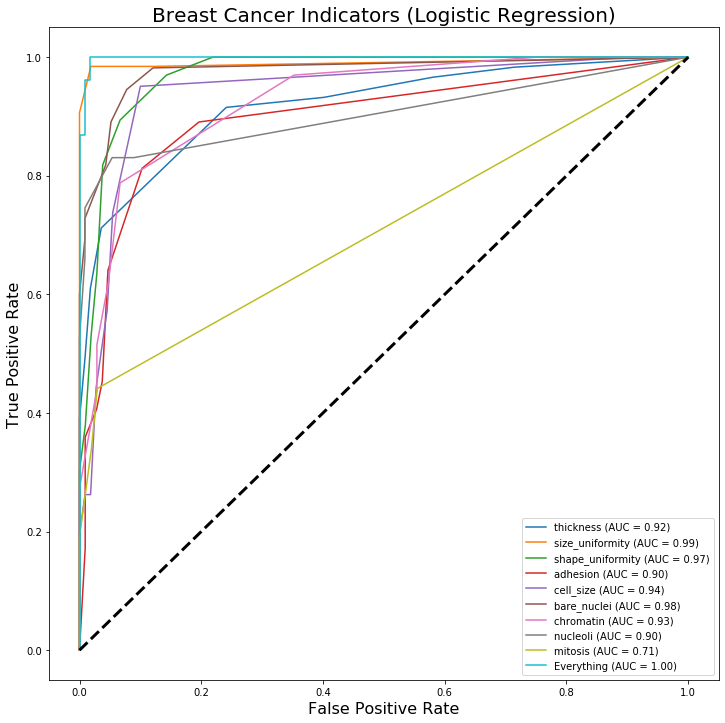

In [9]:
fig, ax = plt.subplots();

# Convert cancer column to 0 or 1
Y  = label_binarize(data.cancer, classes=[2,4]).reshape(-1)

# One Feature at a Time
for feature in independent:
    X = data[feature].to_numpy().reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    model = LR()
    model.fit(X_train,Y_train)
    plot_roc_curve(model,X_test,Y_test,ax=ax,name=feature)

# Everything
X_train, X_test, Y_train, Y_test = train_test_split(data[independent].to_numpy(), Y)
model = LR()
model.fit(X_train,Y_train)
plot_roc_curve(model,X_test, Y_test, ax=ax,name='Everything')

# Fig Stuff
ax.set_title("Breast Cancer Indicators (Logistic Regression)", fontsize='20')
ax.set_ylabel("True Positive Rate",fontsize='16')
ax.set_xlabel("False Positive Rate",fontsize='16')
ax.plot([0,1],[0,1],lw=3,linestyle='--',color="black")
fig.set_size_inches(12,12)
fig.savefig('Visualizations/1/Breast Cancer Indicators ROC (Logistic Regression).jpg')

In [ ]:
def log_reg_rms(X,Y,):

## K Nearest Neighbors

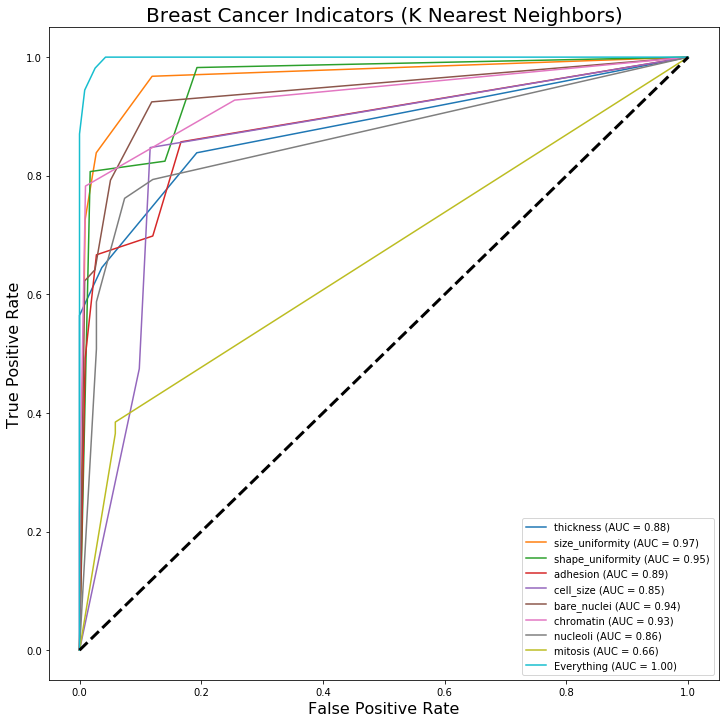

In [10]:
fig, ax = plt.subplots();

# Convert cancer column to 0 or 1
Y  = label_binarize(data.cancer, classes=[2,4]).reshape(-1)

# One Feature at a Time
for feature in independent:
    X = data[feature].to_numpy().reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    model = KNN()
    model.fit(X_train,Y_train)
    plot_roc_curve(model,X_test,Y_test,ax=ax,name=feature)

# Everything
X_train, X_test, Y_train, Y_test = train_test_split(data[independent].to_numpy(), Y)
model = KNN()
model.fit(X_train,Y_train)
plot_roc_curve(model,X_test, Y_test, ax=ax,name='Everything')

# Fig Stuff
ax.set_title("Breast Cancer Indicators (K Nearest Neighbors)", fontsize='20')
ax.set_ylabel("True Positive Rate",fontsize='16')
ax.set_xlabel("False Positive Rate",fontsize='16')
ax.plot([0,1],[0,1],lw=3,linestyle='--',color="black")
fig.set_size_inches(12,12)
fig.savefig('Visualizations/1/Breast Cancer Indicators ROC (K Nearest Neighbors).jpg')

## Gaussian Naive Bayes

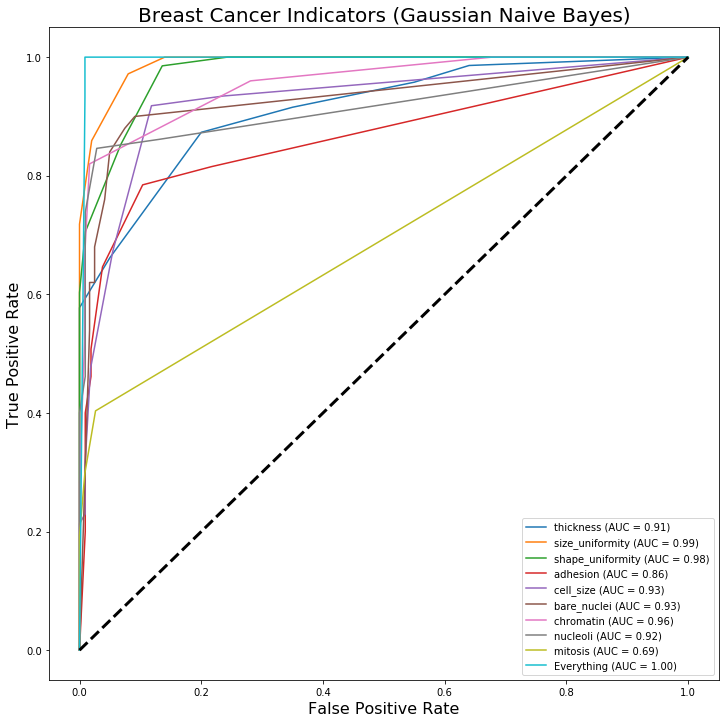

In [12]:
fig, ax = plt.subplots();

# Convert cancer column to 0 or 1
Y  = label_binarize(data.cancer, classes=[2,4]).reshape(-1)

# One Feature at a Time
for feature in independent:
    X = data[feature].to_numpy().reshape(-1,1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    model = GNB()
    model.fit(X_train,Y_train)
    plot_roc_curve(model,X_test,Y_test,ax=ax,name=feature)

# Everything
X_train, X_test, Y_train, Y_test = train_test_split(data[independent].to_numpy(), Y)
model = GNB()
model.fit(X_train,Y_train)
plot_roc_curve(model,X_test, Y_test, ax=ax,name='Everything')

# Fig Stuff
ax.set_title("Breast Cancer Indicators (Gaussian Naive Bayes)", fontsize='20')
ax.set_ylabel("True Positive Rate",fontsize='16')
ax.set_xlabel("False Positive Rate",fontsize='16')
ax.plot([0,1],[0,1],lw=3,linestyle='--',color="black")
fig.set_size_inches(12,12)
fig.savefig('Visualizations/1/Breast Cancer Indicators ROC (Guassian Naive Bayes).jpg')

# Conclusion